# Date - 17/10/2023

# Team ID - 720

# Project Title - Covid-19 Cases Analysis

## Importing the dependencies


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv("Covid_19_cases4.csv")

In [58]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria
...,...,...,...,...,...,...,...
2725,06-03-2021,6,3,2021,3455,17,Sweden
2726,05-03-2021,5,3,2021,4069,12,Sweden
2727,04-03-2021,4,3,2021,4884,14,Sweden
2728,03-03-2021,3,3,2021,4876,19,Sweden


## EXPLORING THE DATASET

### 1. Displaying the top 5 rows

In [59]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria


### 2. Displaying the bottom 5 rows

In [60]:
data.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
2725,06-03-2021,6,3,2021,3455,17,Sweden
2726,05-03-2021,5,3,2021,4069,12,Sweden
2727,04-03-2021,4,3,2021,4884,14,Sweden
2728,03-03-2021,3,3,2021,4876,19,Sweden
2729,02-03-2021,2,3,2021,6191,19,Sweden


## 3.Find the shape of the dataset

In [82]:
data.shape

(2730, 7)

## 4. Displaying the information


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  2730 non-null   object
 1   day                      2730 non-null   int64 
 2   month                    2730 non-null   int64 
 3   year                     2730 non-null   int64 
 4   cases                    2730 non-null   int64 
 5   deaths                   2730 non-null   int64 
 6   countriesAndTerritories  2730 non-null   object
dtypes: int64(5), object(2)
memory usage: 149.4+ KB


## 5. Cheking for null values

In [84]:
data.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
dtype: int64

## 6. Check for duplicate and drop them

In [85]:
dup = data.duplicated().any()

In [86]:
print(dup)

False


## 7.Get the entire statistics of the data

In [87]:
data.describe()

,day,month,year,cases,deaths
count,2730.000000,2730.000000,2730.0,2730.000000,2730.000000
mean,16.000000,4.010989,2021.0,3661.010989,65.291941
std,8.765919,0.818813,0.0,6490.510073,113.956634
min,1.000000,3.000000,2021.0,-2001.000000,-3.000000
25%,8.000000,3.000000,2021.0,361.250000,2.000000
50%,16.000000,4.000000,2021.0,926.500000,14.500000
75%,24.000000,5.000000,2021.0,3916.250000,72.000000
max,31.000000,5.000000,2021.0,53843.000000,956.000000


## VISUALISING THE DATA

<AxesSubplot:xlabel='cases', ylabel='Count'>

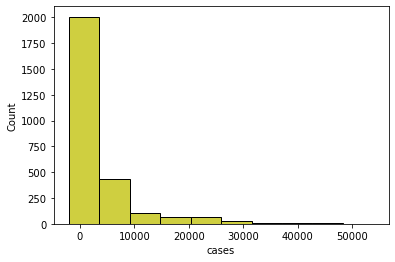

In [88]:
sns.histplot(data, x='cases', bins=10, color='y')

<AxesSubplot:xlabel='deaths', ylabel='Count'>

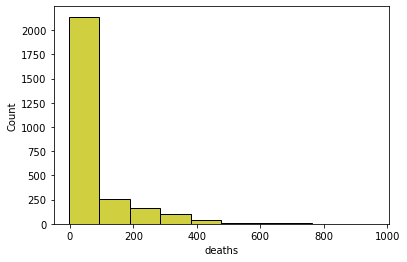

In [89]:
sns.histplot(data, x='deaths', bins=10, color='y')

In [90]:
M=(data.groupby('month')['cases']).sum()

In [91]:
M

month
3    4223468
4    3938341
5    1832751
Name: cases, dtype: int64

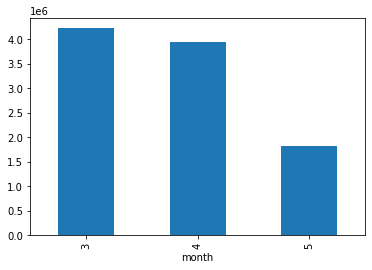

In [92]:
M.plot.bar()
plt.show()

<Figure size 864x576 with 0 Axes>

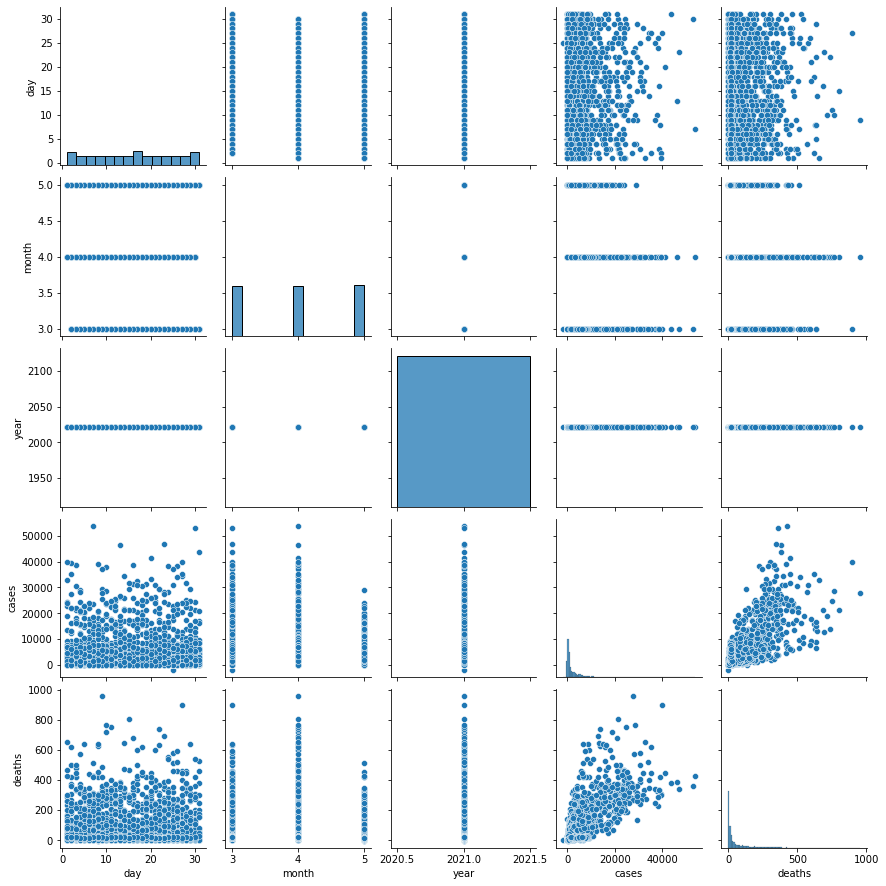

In [93]:

plt.figure(figsize=(12,8))
sns.pairplot(data)

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'cases'}>],
       [<AxesSubplot:title={'center':'deaths'}>, <AxesSubplot:>]],
      dtype=object)

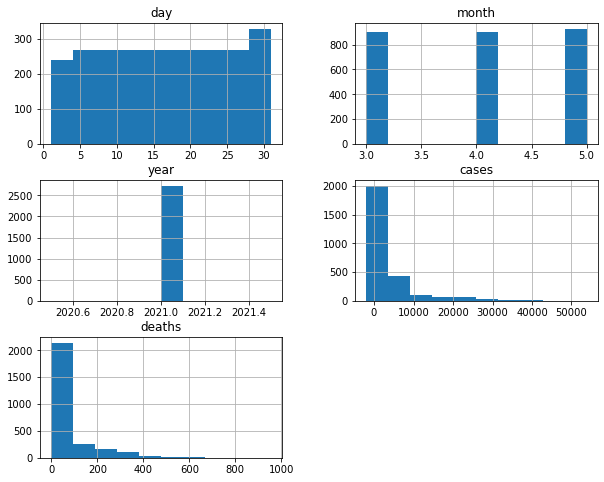

In [94]:
data.hist(figsize=(10,8))

In [95]:
C=data.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending = False)
C

countriesAndTerritories
France           2020808
Italy            1290738
Germany          1234058
Poland           1164964
Netherlands       557983
Spain             552723
Czechia           421221
Sweden            404019
Hungary           371613
Belgium           288119
Romania           275590
Greece            210201
Austria           184416
Slovakia          178475
Bulgaria          171236
Croatia           113168
Lithuania          77040
Denmark            69188
Slovenia           63550
Estonia            62916
Norway             53995
Latvia             46912
Portugal           44096
Ireland            42057
Cyprus             37700
Finland            34760
Luxembourg         14464
Malta               7586
Iceland              527
Liechtenstein        437
Name: cases, dtype: int64

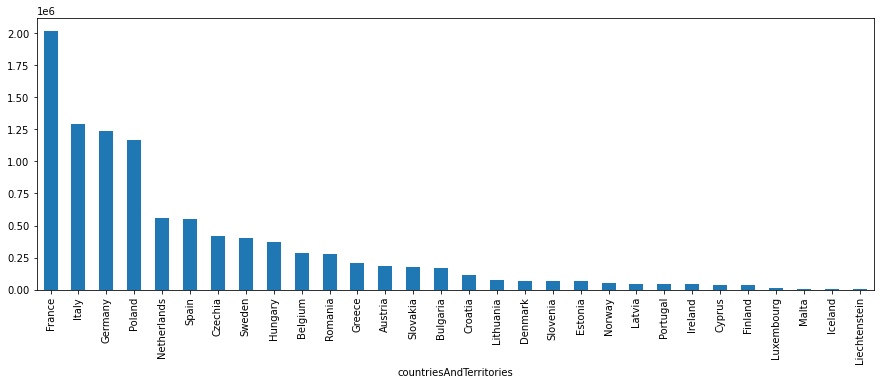

In [96]:
C.plot.bar(figsize=(15,5))
plt.show()

## How many Cases Everyday

In [97]:
Day = data.groupby(['month','day'])[['cases']].sum()
Day

cases
month day        
3     2    101010
      3    118005
      4    134054
      5    132634
      6    126808
...           ...
5     27    43493
      28    46796
      29    35162
      30    31680
      31    34985

[91 rows x 1 columns]

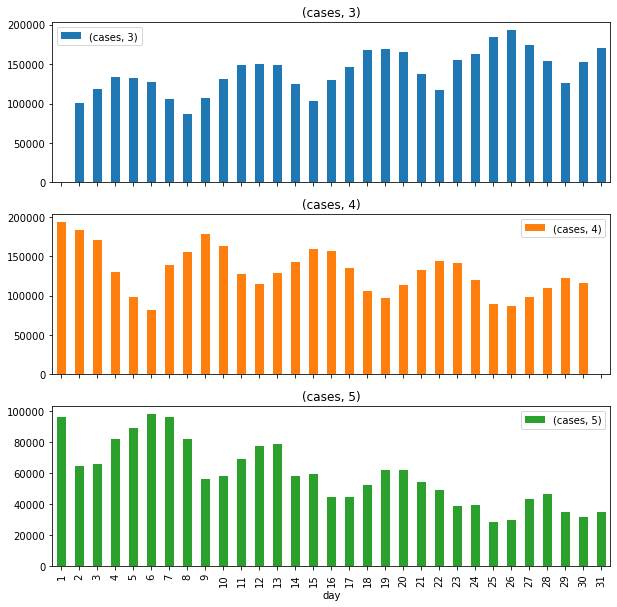

In [98]:
Day.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,10))
plt.show()

In [99]:
data.corr()

,day,month,year,cases,deaths
day,1.000000,-0.022973,NaN,-0.026988,-0.038128
month,-0.022973,1.000000,NaN,-0.172412,-0.126515
year,NaN,NaN,NaN,NaN,NaN
cases,-0.026988,-0.172412,NaN,1.000000,0.766309
deaths,-0.038128,-0.126515,NaN,0.766309,1.000000


<AxesSubplot:>

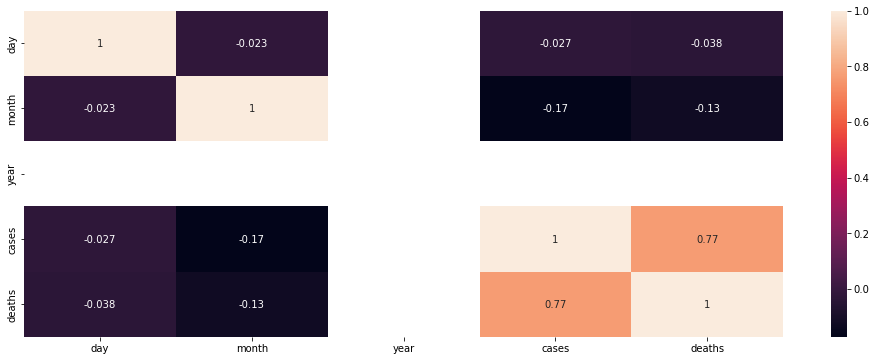

In [100]:
plt.figure(figsize = (17,6))
sns.heatmap(data.corr(),annot=True)

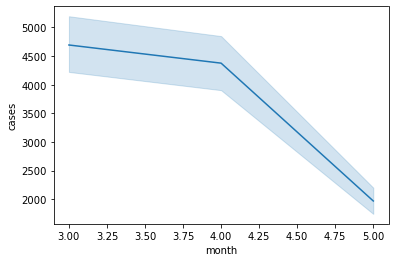

In [101]:
sns.lineplot(x="month", y="cases", data=data) 
plt.show()